<a href="https://colab.research.google.com/github/siddcodes11/galaxy-classification/blob/classification_model/gz2_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import logging

logging.basicConfig(level=logging.INFO)

In [ ]:
!git clone https://github.com/mwalmsley/zoobot.git

Cloning into 'zoobot'...
remote: Enumerating objects: 8206, done.
remote: Counting objects: 100% (2194/2194), done.
remote: Compressing objects: 100% (690/690), done.
remote: Total 8206 (delta 1521), reused 2161 (delta 1494), pack-reused 6012
Receiving objects: 100% (8206/8206), 334.15 MiB | 23.86 MiB/s, done.
Resolving deltas: 100% (5112/5112), done.


In [ ]:
pip install -e "zoobot[pytorch_cu113]" --extra-index-url https://download.pytorch.org/whl/cu113


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
Obtaining file:///content/zoobot
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 713.2/713.2 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 933.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 

In [ ]:
!pip install -e /content/zoobot[pytorch_colab]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/zoobot
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for zoobot (pyproject.toml) ... done
  Created wheel for zoobot: filename=zoobot-1.0.2-0.editable-py3-none-any.whl size=19636 sha256=3d8fca9a1fac980f13c87b52faeacc9b185de77495555304b9693fdc951adcc5
  Stored in directory: /tmp/pip-ephem-wheel-cache-yhrsdq2q/wheels/39/97/99/babc0b1540b00fb58c49189324d224b67a35b76fa6edf183e1
Successfully built zoobot
  Attempting uninstall: zoobot
    Found existing installation: zoobot 1.0.2
    Uninstalling zoobot-1.0.2:
      Successfully uninstalled zoobot-1.0.2


In [ ]:
!pip install galaxy-datasets[pytorch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import sys
zoobot_dir = '/content/zoobot'
os.chdir(zoobot_dir)
sys.path.append(zoobot_dir)
!git pull

Already up to date.


In [ ]:
from galaxy_datasets import gz2  # or gz_hubble, gz_candels, ...

catalog, label_cols = gz2(
    root='gz2',
    train=True,
    download=True
)

100%|██████████| 22392239/22392239 [00:00<00:00, 71070430.06it/s]


100%|██████████| 5852873/5852873 [00:00<00:00, 15328048.87it/s]


100%|██████████| 2671470353/2671470353 [01:41<00:00, 26358719.51it/s]


Extracting gz2/images_gz2.tar.gz to gz2


GZDESI and GZRings not available from galaxy_datasets.pytorch.datasets - skipping
[37.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4. 33. 32.  5.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


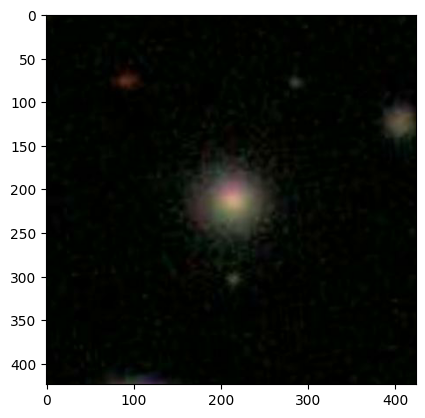

In [ ]:
from galaxy_datasets.pytorch import GZ2
import matplotlib.pyplot as plt

gz2_dataset = GZ2(
    root='gz2',
    train=True,
    download=False
)
image, label = gz2_dataset[0]
plt.imshow(image)
print(label)

In [ ]:
from galaxy_datasets.pytorch.galaxy_datamodule import GalaxyDataModule

datamodule = GalaxyDataModule(
    label_cols=['smooth-or-featured-gz2_smooth'],
    catalog=catalog
    # optional args to specify augmentations
)

datamodule.prepare_data()
datamodule.setup()
for images, labels in datamodule.train_dataloader():
    print(images.shape, labels.shape)
    break

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([256, 1, 224, 224]) torch.Size([256])


In [ ]:
catalog.head()

,ra,dec,smooth-or-featured-gz2_smooth,smooth-or-featured-gz2_featured-or-disk,smooth-or-featured-gz2_artifact,disk-edge-on-gz2_yes,disk-edge-on-gz2_no,bar-gz2_yes,bar-gz2_no,has-spiral-arms-gz2_yes,...,something-odd-gz2_semantic,how-rounded-gz2_semantic,bulge-shape-gz2_semantic,spiral-winding-gz2_semantic,spiral-arm-count-gz2_semantic,summary,leaf_prob,label,filename,id_str
0,194.055664,27.823219,37,0,1,0,0,0,0,0,...,something-odd-gz2_no,how-rounded-gz2_round,-,-,-,smooth_round,0.842105,1,587741602572468407.jpg,587741602572468407
1,162.939468,21.025589,40,2,1,0,2,0,2,0,...,something-odd-gz2_no,how-rounded-gz2_in-between,-,-,-,smooth_inbetween,0.697674,0,587742061600833690.jpg,587742061600833690
2,132.911163,25.326416,18,22,1,0,22,4,18,6,...,something-odd-gz2_yes,-,-,-,-,featured_without_bar_or_spiral,0.319290,6,587739115241013526.jpg,587739115241013526
3,216.752670,0.869107,36,3,4,0,3,0,3,0,...,something-odd-gz2_no,how-rounded-gz2_in-between,-,-,-,smooth_inbetween,0.511628,0,587722984440529062.jpg,587722984440529062
4,236.762390,5.435655,22,14,2,13,1,0,1,0,...,something-odd-gz2_no,how-rounded-gz2_cigar,-,-,-,smooth_cigar,0.578947,2,587736547389866123.jpg,587736547389866123


In [ ]:
label_cols

['smooth-or-featured-gz2_smooth',
 'smooth-or-featured-gz2_featured-or-disk',
 'smooth-or-featured-gz2_artifact',
 'disk-edge-on-gz2_yes',
 'disk-edge-on-gz2_no',
 'has-spiral-arms-gz2_yes',
 'has-spiral-arms-gz2_no',
 'bar-gz2_yes',
 'bar-gz2_no',
 'bulge-size-gz2_dominant',
 'bulge-size-gz2_obvious',
 'bulge-size-gz2_just-noticeable',
 'bulge-size-gz2_no',
 'something-odd-gz2_yes',
 'something-odd-gz2_no',
 'how-rounded-gz2_round',
 'how-rounded-gz2_in-between',
 'how-rounded-gz2_cigar',
 'bulge-shape-gz2_round',
 'bulge-shape-gz2_boxy',
 'bulge-shape-gz2_no-bulge',
 'spiral-winding-gz2_tight',
 'spiral-winding-gz2_medium',
 'spiral-winding-gz2_loose',
 'spiral-arm-count-gz2_1',
 'spiral-arm-count-gz2_2',
 'spiral-arm-count-gz2_3',
 'spiral-arm-count-gz2_4',
 'spiral-arm-count-gz2_more-than-4',
 'spiral-arm-count-gz2_cant-tell']

In [ ]:
checkpoint_dir = os.path.join(zoobot_dir, 'data/pretrained_models/pytorch') 

In [ ]:
!wget --no-check-certificate 'https://dl.dropboxusercontent.com/s/7ixwo59imjfz4ay/effnetb0_greyscale_224px.ckpt?dl=0' -O $checkpoint_dir/checkpoint.ckpt

--2023-04-14 20:03:42--  https://dl.dropboxusercontent.com/s/7ixwo59imjfz4ay/effnetb0_greyscale_224px.ckpt?dl=0
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:6016:15::a27d:10f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.1.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17384753 (17M) [application/octet-stream]
Saving to: ‘/content/zoobot/data/pretrained_models/pytorch/checkpoint.ckpt’

/content/zoobot/dat 100%[===================>]  16.58M  57.5MB/s    in 0.3s    

2023-04-14 20:03:45 (57.5 MB/s) - ‘/content/zoobot/data/pretrained_models/pytorch/checkpoint.ckpt’ saved [17384753/17384753]



In [ ]:
import pandas as pd

from zoobot.pytorch.training import finetune
from galaxy_datasets.pytorch.galaxy_datamodule import GalaxyDataModule

In [ ]:
checkpoint_loc = os.path.join(zoobot_dir, 'data/pretrained_models/pytorch/checkpoint.ckpt') 
save_dir = os.path.join(zoobot_dir, 'results/pytorch/finetune/finetune_binary_classification')

In [ ]:
label_cols=['smooth-or-featured-gz2_smooth','smooth-or-featured-gz2_featured-or-disk','smooth-or-featured-gz2_artifact','disk-edge-on-gz2_yes','disk-edge-on-gz2_no','has-spiral-arms-gz2_yes','has-spiral-arms-gz2_no','bar-gz2_yes','bar-gz2_no','bulge-size-gz2_dominant','bulge-size-gz2_obvious','bulge-size-gz2_just-noticeable','bulge-size-gz2_no','something-odd-gz2_yes','something-odd-gz2_no','how-rounded-gz2_round','how-rounded-gz2_in-between','how-rounded-gz2_cigar','bulge-shape-gz2_round','bulge-shape-gz2_boxy','bulge-shape-gz2_no-bulge','spiral-winding-gz2_tight','spiral-winding-gz2_medium','spiral-winding-gz2_loose','spiral-arm-count-gz2_1','spiral-arm-count-gz2_2','spiral-arm-count-gz2_3','spiral-arm-count-gz2_4','spiral-arm-count-gz2_more-than-4','spiral-arm-count-gz2_cant-tell']  # name of column in catalog with binary (0 or 1) labels for your classes]
 # To support more complicated labels, Zoobot expects a list of columns. A list with one element works fine.

In [ ]:
datamodule = GalaxyDataModule(
  label_cols=label_cols,
  catalog= catalog,
  batch_size=32,
  resize_after_crop=224,  # the size of the images input to the model
  num_workers=2  # sets the parallelism for loading data. 2 works well on colab.
)

In [ ]:
assert all([os.path.isfile(loc) for loc in catalog['file_loc']])

In [ ]:
model = finetune.FinetuneableZoobotClassifier(
  checkpoint_loc= checkpoint_loc,
  num_classes=5,
  n_layers=5 # only updating the head weights. Set 0 for only output layer. Set e.g. 1, 2 to finetune deeper. 
) 

In [1]:
import torch
import torch.nn as nn
import pytorch_lightning as pl

class MyLightningModule(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.loss_fn = nn.BCEWithLogitsLoss()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3, stride=1, padding=1)
        self.activation = nn.Sigmoid()
        self.fc = nn.Linear(10*224*224, 30)

    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss_fn(logits, y)
        self.log('train_loss', loss, on_epoch=True, on_step=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

model = MyLightningModule()
trainer = finetune.get_trainer(save_dir, accelerator='auto', devices='auto', max_epochs=130)
trainer.fit(model, datamodule)


ModuleNotFoundError: ignored

In [ ]:
'smooth-or-featured-gz2_smooth','smooth-or-featured-gz2_featured-or-disk','smooth-or-featured-gz2_artifact','disk-edge-on-gz2_yes','disk-edge-on-gz2_no','has-spiral-arms-gz2_yes','has-spiral-arms-gz2_no','bar-gz2_yes','bar-gz2_no','bulge-size-gz2_dominant','bulge-size-gz2_obvious','bulge-size-gz2_just-noticeable','bulge-size-gz2_no','something-odd-gz2_yes','something-odd-gz2_no','how-rounded-gz2_round','how-rounded-gz2_in-between','how-rounded-gz2_cigar','bulge-shape-gz2_round','bulge-shape-gz2_boxy','bulge-shape-gz2_no-bulge','spiral-winding-gz2_tight','spiral-winding-gz2_medium','spiral-winding-gz2_loose','spiral-arm-count-gz2_1','spiral-arm-count-gz2_2','spiral-arm-count-gz2_3','spiral-arm-count-gz2_4','spiral-arm-count-gz2_more-than-4','spiral-arm-count-gz2_cant-tell']  # name of column in catalog with binary (0 or 1) labels for your classes